<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 170.0 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [29]:
# Define the URL of the dataset
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [30]:
duplicate_rows =df[df.duplicated()]
print(len(duplicate_rows))
print(duplicate_rows.head())

20
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   
65440                  

In [31]:
df.shape

(65457, 114)

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [34]:
df.drop_duplicates(inplace=True)
df.shape

(65437, 114)

### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [45]:
import numpy as np
missing_values = df.isnull().sum()
print(missing_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [43]:
#print (missing_values['EdLevel'].value_counts())  
df['EdLevel'] = df['EdLevel'].fillna(df['EdLevel'].mode()[0])
print(missing_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [44]:
missing_values = df['ConvertedCompYearly'].isnull().sum()
print(missing_values)

42002


In [46]:
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])
print(df_cleaned['ConvertedCompYearly'].isnull().sum())

0


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 135.5 MB/s eta 0:00:00


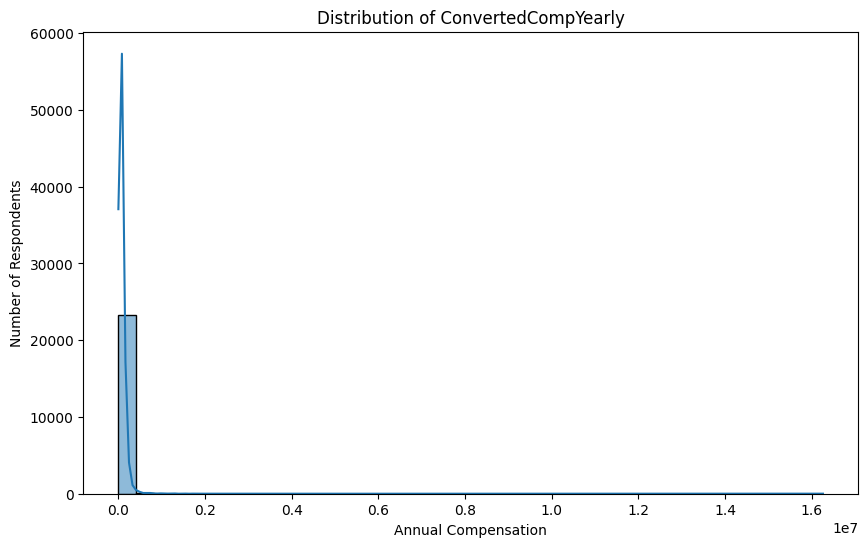

In [48]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['ConvertedCompYearly'], bins=40, kde=True)
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('Annual Compensation')
plt.ylabel('Number of Respondents')
plt.show()

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
